In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [205]:
df = pd.read_excel('../data/raw/AQI_hourly_city_level_sohna_2023.xlsx')

In [206]:
df.head()

,Days,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,1,265,211.0,204.0,191,186.0,184.0,161.0,143,151.0,...,150.0,124.0,128,122.0,111.0,111.0,180.0,240,260.0,280.0
1,2,313,332.0,327.0,300,293.0,278.0,270.0,272,274.0,...,399.0,390.0,384,392.0,378.0,349.0,349.0,350,339.0,331.0
2,3,328,302.0,316.0,323,340.0,346.0,353.0,363,370.0,...,418.0,404.0,394,374.0,360.0,381.0,374.0,383,404.0,397.0
3,4,376,355.0,343.0,347,332.0,337.0,327.0,304,275.0,...,309.0,293.0,293,285.0,282.0,275.0,300.0,328,372.0,377.0
4,5,388,376.0,378.0,375,357.0,326.0,283.0,203,157.0,...,300.0,292.0,293,298.0,318.0,256.0,340.0,359,390.0,396.0


In [207]:
df.dtypes

Days          int64
00:00:00      int64
01:00:00    float64
02:00:00    float64
03:00:00      int64
04:00:00    float64
05:00:00    float64
06:00:00    float64
07:00:00      int64
08:00:00    float64
09:00:00      int64
10:00:00    float64
11:00:00      int64
12:00:00      int64
13:00:00    float64
14:00:00    float64
15:00:00    float64
16:00:00      int64
17:00:00    float64
18:00:00    float64
19:00:00    float64
20:00:00    float64
21:00:00      int64
22:00:00    float64
23:00:00    float64
dtype: object

In [208]:
# checking for missing values
df.isnull().sum()

Days        0
00:00:00    0
01:00:00    1
02:00:00    1
03:00:00    0
04:00:00    1
05:00:00    1
06:00:00    1
07:00:00    0
08:00:00    1
09:00:00    0
10:00:00    1
11:00:00    0
12:00:00    0
13:00:00    1
14:00:00    2
15:00:00    3
16:00:00    0
17:00:00    1
18:00:00    3
19:00:00    2
20:00:00    1
21:00:00    0
22:00:00    1
23:00:00    1
dtype: int64

In [209]:
# treating missing values with mean
df = df.fillna(df.mean())

In [210]:
# now again checking for missing values
df.isnull().sum()

Days        0
00:00:00    0
01:00:00    0
02:00:00    0
03:00:00    0
04:00:00    0
05:00:00    0
06:00:00    0
07:00:00    0
08:00:00    0
09:00:00    0
10:00:00    0
11:00:00    0
12:00:00    0
13:00:00    0
14:00:00    0
15:00:00    0
16:00:00    0
17:00:00    0
18:00:00    0
19:00:00    0
20:00:00    0
21:00:00    0
22:00:00    0
23:00:00    0
dtype: int64

In [211]:
# checking for duplicated values
df.duplicated().sum()

np.int64(0)

In [212]:
if not (df['Days'].between(1, 365).all()):
    print(f"{'Days'} out of range (1-365):")
    print(df[~df['Days'].between(1, 365)])
else:
    print(f"Validating {'Days'} (1-365) succeeded.")

Validating Days (1-365) succeeded.


In [213]:
# check if all the aqi cols have numbers or not
aqi_columns = df.columns[1:] 
for col in aqi_columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print("Yes, all columns are numeric!")
        

Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!
Yes, all columns are numeric!


In [214]:
df.isnull().sum()

Days        0
00:00:00    0
01:00:00    0
02:00:00    0
03:00:00    0
04:00:00    0
05:00:00    0
06:00:00    0
07:00:00    0
08:00:00    0
09:00:00    0
10:00:00    0
11:00:00    0
12:00:00    0
13:00:00    0
14:00:00    0
15:00:00    0
16:00:00    0
17:00:00    0
18:00:00    0
19:00:00    0
20:00:00    0
21:00:00    0
22:00:00    0
23:00:00    0
dtype: int64

In [215]:
pd.read_csv('../data/processed/cleaned_aqi_sohna_hourly.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/cleaned_aqi_sohna_hourly.csv'

In [ ]:
df = pd.read_csv("../outputs/forecasts/aqi_forecast_sohna_next_year.csv")

In [ ]:
# checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [217]:
# now extracting the cleaned data to preprocessed dir
df.to_csv("../data/processed/cleaned_aqi_sohna_hourly.csv", index=False)

In [ ]:
melted_df = df.melt(id_vars=['Date'], value_vars=df.columns[1:], 
                    var_name='Hour', value_name='AQI')

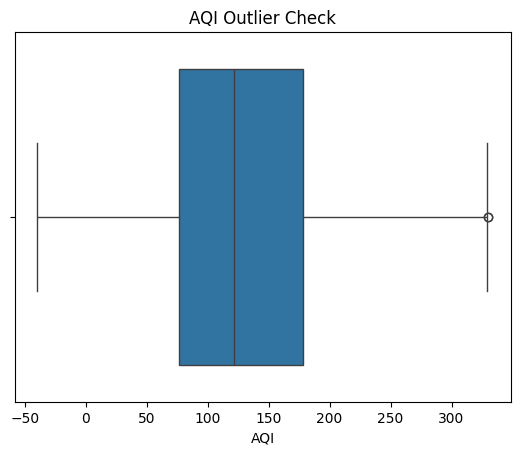

In [ ]:
sns.boxplot(data=melted_df, x='AQI')
plt.title("AQI Outlier Check")
plt.show()

In [ ]:
# after removing outliers
df = pd.read_csv("../outputs/forecasts/aqi_forecast_sohna_next_year.csv")

In [ ]:
melted_df = df.melt(id_vars=['Date'], value_vars=df.columns[1:], var_name='Hour', value_name='AQI')

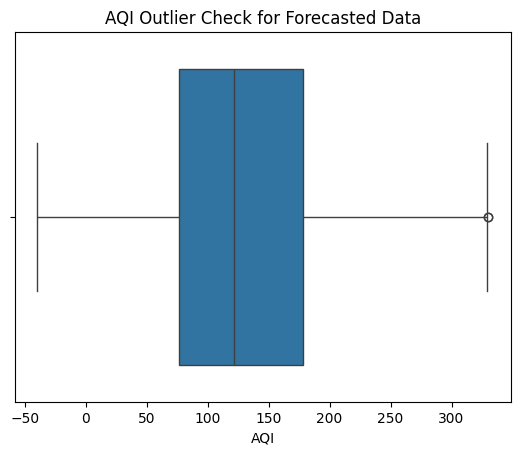

In [ ]:
sns.boxplot(data=melted_df, x='AQI')
plt.title("AQI Outlier Check for Forecasted Data")
plt.show()

In [ ]:
pd.read_csv('../data/processed/cleaned_aqi_sohna_hourly.csv')

,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2024-01-01,295.142227,290.170580,286.011240,282.894711,278.816806,273.094276,268.150056,267.532967,272.176341,...,262.288041,258.563633,253.734777,248.230932,246.107264,251.990091,266.518577,284.693933,299.002667,304.720842
1,2024-01-02,302.755141,297.724615,293.433462,290.115948,285.772338,279.724459,274.400885,273.356554,277.531321,...,264.356969,260.072640,254.698722,248.670908,246.050157,251.468076,265.568550,283.356901,297.323091,302.745947
2,2024-01-03,300.534206,295.308244,290.872854,287.462171,283.075615,277.033483,271.762159,270.813778,275.124824,...,263.369980,259.375228,254.291567,248.549268,246.204023,251.882404,266.223562,284.228453,298.383102,303.962882
3,2024-01-04,301.873608,296.733301,292.345007,288.941734,284.522418,278.407515,273.024212,271.926075,276.051625,...,262.614662,258.284044,252.861767,246.783404,244.109972,249.473309,263.517699,281.249017,295.157924,300.524073
4,2024-01-05,298.257135,292.978509,288.494077,285.039104,280.614157,274.540664,269.246110,268.283660,272.590739,...,261.059288,257.144973,252.153371,246.513942,244.281319,250.080765,264.549880,282.687833,296.978639,302.695457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2025-12-26,224.049237,218.862185,214.469357,211.106019,206.772738,200.790944,195.588122,194.717437,199.116316,...,188.136431,184.314178,179.414679,173.867394,171.726957,177.618632,192.180019,210.410289,224.793457,230.602682
726,2025-12-27,228.741378,223.825002,219.653897,216.458264,212.234152,206.299088,201.077324,200.119517,204.361349,...,190.975930,186.527195,180.946855,174.669842,171.756921,176.840077,190.564160,207.936034,221.447775,226.380877
727,2025-12-28,223.647273,217.871032,212.861099,208.856173,203.860605,197.199927,191.306009,189.736655,193.434133,...,178.474765,174.075600,168.637158,162.593493,160.003558,165.496622,179.713931,197.657905,211.815379,217.461872
728,2025-12-29,215.502667,210.554588,206.418816,203.325856,199.271521,193.572561,188.651913,188.058397,192.725345,...,182.978546,179.277733,174.472476,168.992234,166.892173,172.798613,187.350716,205.549696,219.882058,225.623868
